Time taken to predict 8800 test images is 6s
Average prediction time: 0.000729s


Classification Report
---------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           1       1.00      1.00      1.00       180
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       207
           4       0.99      1.00      1.00       197
           5       1.00      1.00      1.00       196
           6       1.00      1.00      1.00       194
           7       1.00      1.00      1.00       210
           8       1.00      1.00      1.00       201
           9       1.00      1.00      1.00       193
          10       1.00      1.00      1.00       193
          11       1.00      1.00      1.00       206
          12       1.00      0.99      1.00       211
          13       1.00      1.00      1.00       223
          14       1.00      1.00      1.00       214
   

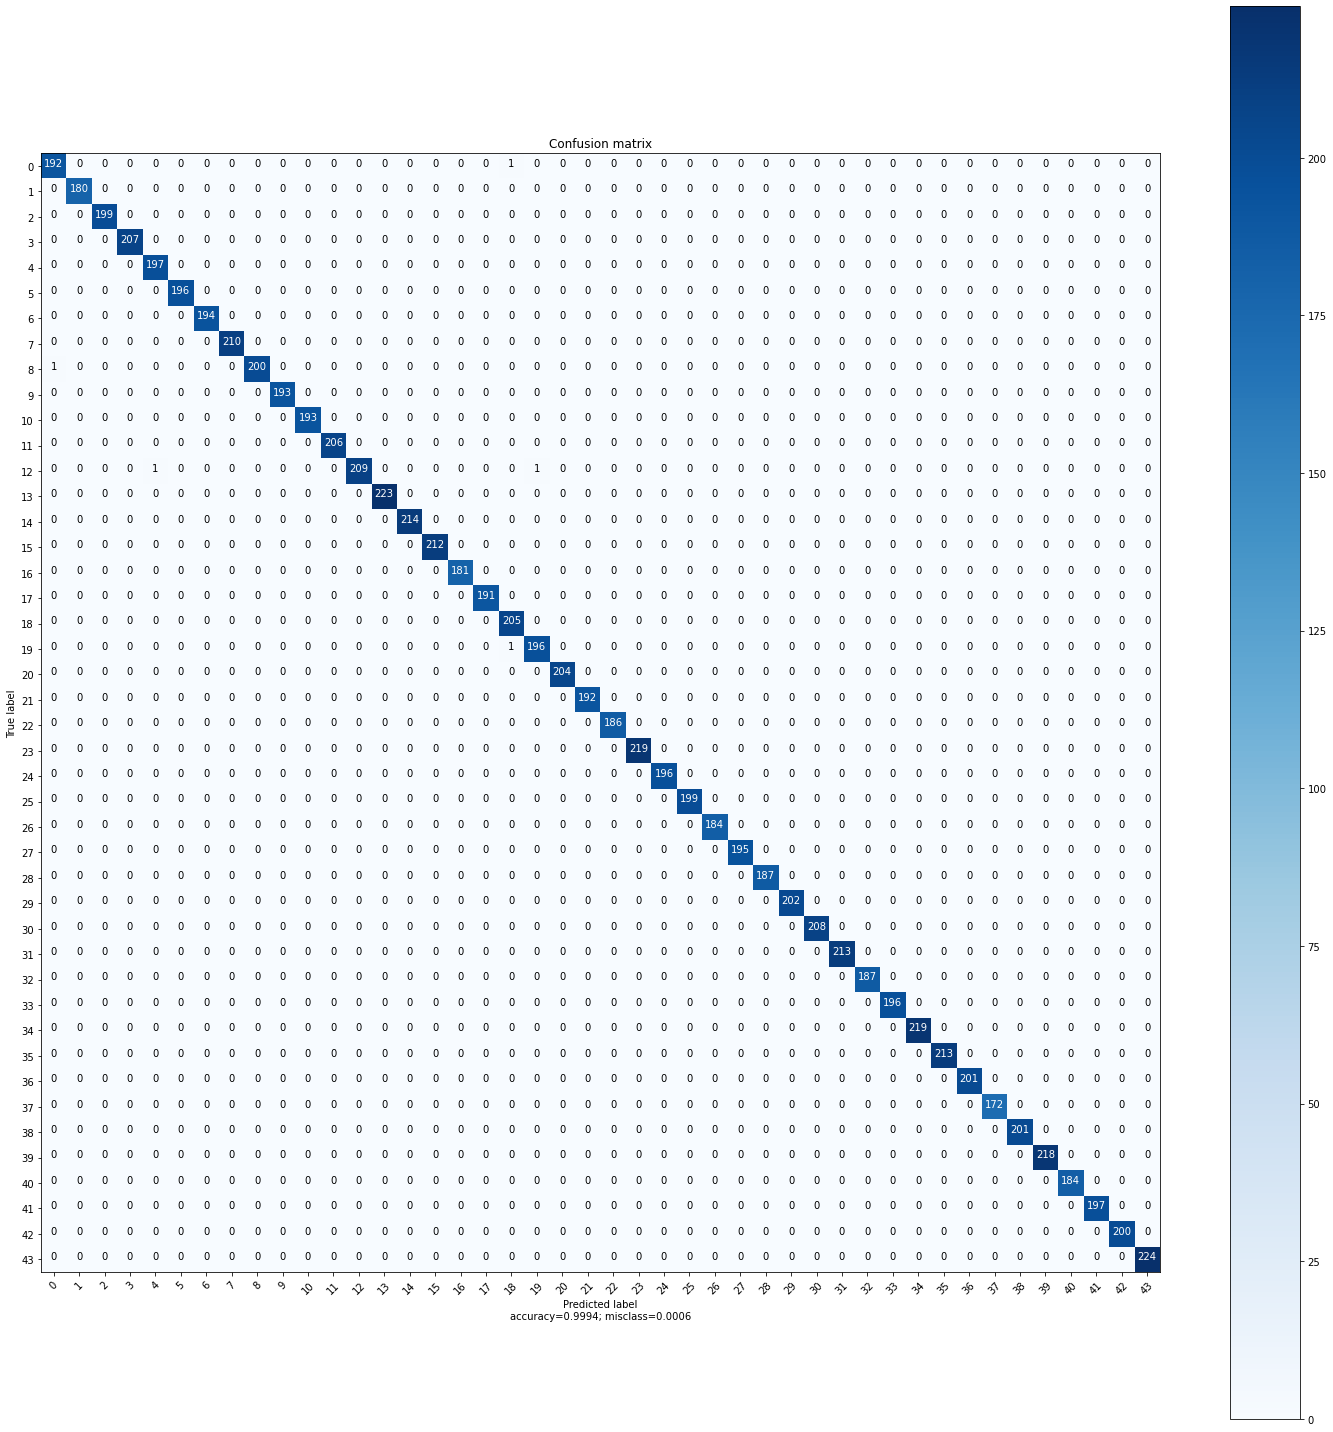

In [1]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('confusion_matrix.png')


image_x, image_y = 50, 50
with open("test_images", "rb") as f:
    test_images = np.array(pickle.load(f))
with open("test_labels", "rb") as f:
    test_labels = np.array(pickle.load(f), dtype=np.int32)
test_images = np.reshape(test_images, (test_images.shape[0], image_x, image_y, 1))

model = load_model('cnn_model_keras2.h5')
pred_labels = []

start_time = time.time()
pred_probabs = model.predict(test_images)
end_time = time.time()
pred_time = end_time-start_time
avg_pred_time = pred_time/test_images.shape[0]
print("Time taken to predict %d test images is %ds" %(test_images.shape[0], pred_time))
print('Average prediction time: %fs' % (avg_pred_time))

for pred_probab in pred_probabs:
    pred_labels.append(list(pred_probab).index(max(pred_probab)))

cm = confusion_matrix(test_labels, np.array(pred_labels))
classification_report = classification_report(test_labels, np.array(pred_labels))
print('\n\nClassification Report') 
print('---------------------------')
print(classification_report)
plot_confusion_matrix(cm, range(44), normalize=False)